In [1]:
# import jtplot module in notebook
# from jupyterthemes import jtplot
# jtplot.style(theme = 'monokai')

In [2]:
import pandas as pd
# https://stackoverflow.com/questions/21151450/how-can-i-add-a-table-of-contents-to-a-jupyter-jupyterlab-notebook

目錄
* [資料處理](#資料處理)
    * [讀取檔案](#讀取檔案)
    * [內文處理](#內文處理)
    * [類別處理](#類別處理)
    * [匯出資料](#匯出資料)
* [訓練模型](#訓練模型)
    * [無斷詞內文](#無斷詞內文)
    * [斷詞內文](#斷詞內文)

## 資料處理

---
### 讀取檔案

In [3]:
# 到時候要跑時請確認檔案路徑
# und = pd.read_csv('D://Downloads//2021大四下//大數據分析//Final Project//選擇性_聯合報//聯合報.csv')
und = pd.read_csv('./聯合報.csv')
und2 = und.drop(columns = ['Unnamed: 0', '時間', '觀看人數', '連結'])
und2.head()

,標題,tag,subtag,內文
0,白宮宣布 美國半數成人接種完畢,['/udn/全球/全球疫情大流行/'],['/新冠肺炎/COVID-19/'],"['白宮宣布，美國將在25日達到50%成人接種新冠肺炎疫苗完畢的里程碑。', '\n', '..."
1,懸賞359萬！ 梁振英尋找來台的香港「爆眼女」,['/udn/兩岸/兩岸要聞/'],['/梁振英/反送中/'],['大陸全國政協副主席、前香港特首梁振英5月25日晚在社交網站宣布，「爆眼女」近日行蹤暴露，...
2,台新金擬發特別股出脫彰銀 籌併購資金更明確,['/udn/產經/金融要聞/'],['/台新金/彰銀/'],['台新金併保德信申請案有重大進展。台新金擬發行8億股己種特別股出脫彰銀股票，金管會今天證實...
3,越南單日本土病例再創高 河內餐飲只限外帶,['/udn/全球/全球疫情大流行/'],['/新冠肺炎/COVID-19/越南/疫情/'],['越南今天新增444例本土病例，再創去年1月疫情爆發以來單日新高紀錄。疫情持續延燒，首都河...
4,繼亞馬遜和臉書後 Google遭德反托拉斯當局盯上,['/udn/全球/全球財經/'],['/德國/愛爾蘭/'],['德國反托拉斯當局今天表示，已對Google是否涉及反競爭行為展開調查。德國已經利用今年1...


### 刪除沒有類別（tag）和內文的文章，確認剩餘文章數

In [4]:
drop_row = []
for i in und2.index:
    if und2['tag'][i] == '[]':
        drop_row.append(i)
    if und2['內文'][i] == '[]' and und2['tag'][i] != '[]':
        drop_row.append(i)
und2 = und2.drop(labels = drop_row, axis = 0).reset_index(drop = True)
len(und2)

3955

---
### 內文處理
基於之前抓的內文
1. 有可能會抓到其他推薦文章的內容
2. 讀取的資料為string的形式，需將內文格式轉為json的讀取的形式，使string可以轉成list，因此部分文章有經過個別處理  
json檔可讀入的字串形式須為`'["a", "b", "c"]'`的型式，也就是string中的內容不能包含雙引號，e.g.`'["a"b", "c"]'` 無法被讀取

#### 部分文章內容個別處理
這裡有把`"`置換成`\'`是因為之後json讀取前還會再將`\'`置換回來，在這裡先置換是讓內文string最外圍的引號為雙引號表示`"`  
  
+ 以`und2['內文'][590]`為例，未處理內文如下，反白處並非文章內文的部分，針對內容，需要進行：  
Step1: 將反白處的部分「移除」（未收錄）→　`und2['內文'][590][:610]`  
Step2: 將`"`置換成`\'`→　`.replace('"', '\'')`  
Step3: 將其餘部分影響讀取json檔的符號置換，視內文而定（所以很麻煩）→　`.replace('s\'', 's’')`  
Step4: 補上`']'`使內文為string →　`+ ']'`  
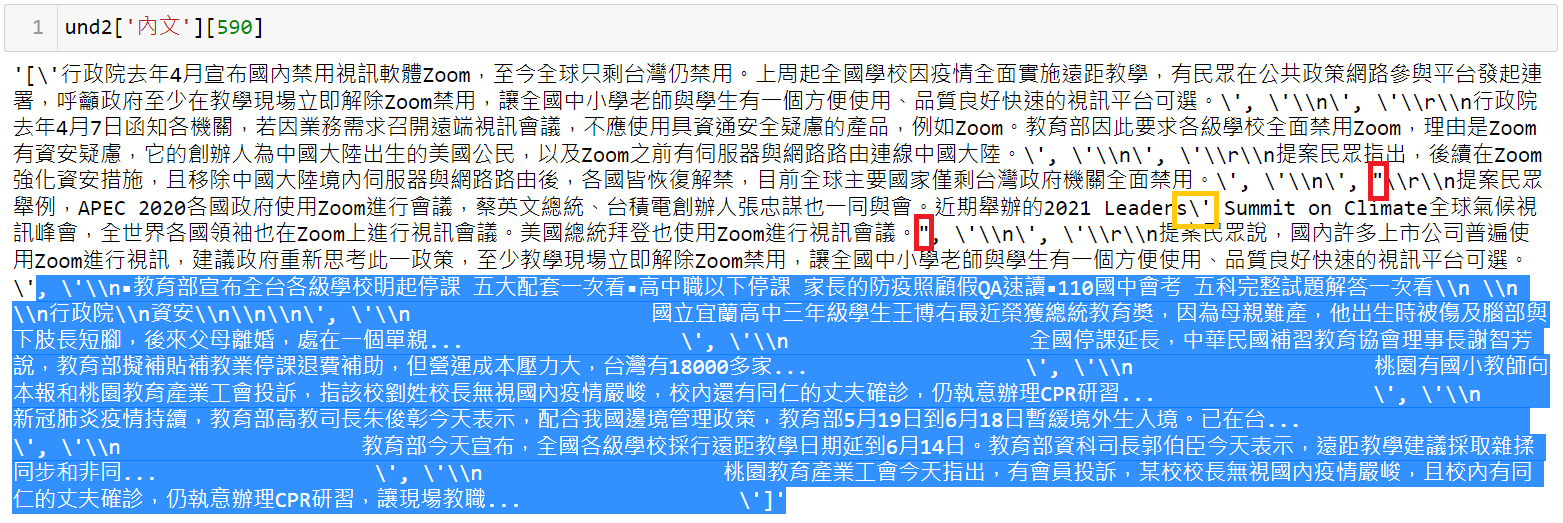


In [5]:
und2['內文'][203] = und2['內文'][203][:1564] + ']'
und2['內文'][590] = und2['內文'][590][:610].replace('"', '\'').replace('s\'', 's’') + ']'
und2['內文'][959] = und2['內文'][959].replace('d\'', 'd’')
und2['內文'][1100] = und2['內文'][1100].replace('O\'', 'O’')
und2['內文'][1330] = und2['內文'][1330].replace('"', '\'').replace('"]', "\']").replace('e\'', 'e’')
und2['內文'][1340] = und2['內文'][1340].replace('O\'', 'O’')
und2['內文'][1403] = und2['內文'][1403][:190] + ']'
und2['內文'][1545] = und2['內文'][1545].replace('"', '\'').replace('L\'', 'L’')
und2['內文'][1717] = und2['內文'][1717].replace('"', '\'').replace('on\'', 'on’')
und2['內文'][2047] = und2['內文'][2047][:892].replace('"', '＂') + ']'
und2['內文'][2050] = und2['內文'][2050][:1900].replace('O\'', 'O’').replace('"', '\'') + ']'
und2['內文'][2121] = und2['內文'][2121][:476].replace('"', '\'').replace('dn\'', 'dn’') + ']'
und2['內文'][2689] = und2['內文'][2689][:717] + ']'
und2['內文'][2690] = und2['內文'][2690][:657] + ']'
und2['內文'][2704] = und2['內文'][2704][:721] + ']'
und2['內文'][2875] = und2['內文'][2875][:923].replace('"', '\'').replace('A\'', 'A’') + ']'
und2['內文'][2940] = und2['內文'][2940][:910] + ']'
und2['內文'][2948] = und2['內文'][2948][:874] + ']'
und2['內文'][3018] = und2['內文'][3018][:441] + ']'
und2['內文'][3047] = und2['內文'][3047][:912] + ']'
und2['內文'][3096] = und2['內文'][3096][:510] + ']'
und2['內文'][3156] = und2['內文'][3156][:778] + ']'
und2['內文'][3163] = und2['內文'][3163][:1182] +']'
und2['內文'][3188] = und2['內文'][3188][:2547].replace('O\'', 'O’').replace('"', '\'') +']'
und2['內文'][3262] = und2['內文'][3262][:1790] + ']'
und2['內文'][3314] = und2['內文'][3314][:1001] + ']'
und2['內文'][3415] = und2['內文'][3415][:2555].replace('O\'', 'O’').replace('"', '\'') + ']'
und2['內文'][3453] = und2['內文'][3453][:577] +']'
und2['內文'][3459] = und2['內文'][3459][:809] + ']'
und2['內文'][3483] = und2['內文'][3483][:1991].replace('O\'', 'O’').replace('"', '\'') + ']'
und2['內文'][3489] = und2['內文'][3489].replace('d\'', 'd’').replace('"', '\'')
und2['內文'][3533] = und2['內文'][3533][:666] + ']'
und2['內文'][3576] = und2['內文'][3576][:1037] + ']'
und2['內文'][3672] = und2['內文'][3672][:2461].replace('"', '\'').replace('\'S', '’S') + ']'
und2['內文'][3796] = und2['內文'][3796][:619].replace('"', '\'').replace('\'i', '’i') +']'
und2['內文'][3861] = und2['內文'][3861].replace('"', '\'').replace('l\'', 'l’')

#### 確認個別文章內容能否用json讀取

In [6]:
# import json
#content = und2['內文'][3672][:2461].replace('"', '\'').replace('\'S', '’S') + ']'
#content = content.replace('\'','"').replace('\\xa0', '').replace('\\n','').replace('\\r', '')
#content = content.replace('\\','').replace('"s', '’s').replace('s"', 's’')
##print(content,'\n')
#content = json.loads(content)  
#content = ''.join(content)
##print(1,content,'\n')

#### json讀取內文並將 str 轉為 list，再用成 DataFrame
+ 待之前步驟處理好後  
Step5: 把`\'`置換成`"`，讓json可以讀 →　`.replace('\'','"'))`  
可順便把多餘的換行或其餘符號刪去 →　`.replace('\\n','').replace('\\r', '').replace('\\','').replace('"s', '’s')`

In [7]:
import json
content = ''.join(json.loads(und2['內文'][0].replace('\'','"'))).replace('\n', '').replace('\r', '')
#aa = pd.DataFrame(content, columns = '1')
new_content = pd.DataFrame({'內文': [content]})
#und2_content = pd.DataFrame()
for i, content in enumerate(und2['內文'][1:]):
    content = content.replace('\'','"').replace('\\n','').replace('\\r', '')
    content = content.replace('\\','').replace('"s', '’s')
    #print(i+1)
    content = json.loads(content)  # json 要 外面是'，裡面是"才給 load
    # https://stackoverflow.com/questions/1894269/how-to-convert-string-representation-of-list-to-a-list
    content = ''.join(content)
    # https://stackoverflow.com/questions/12453580/how-to-concatenate-items-in-a-list-to-a-single-string
    new_content = pd.concat([new_content, pd.DataFrame({'內文': [content]})])
new_content = new_content.reset_index(drop = True)
new_content.head()

,內文
0,白宮宣布，美國將在25日達到50%成人接種新冠肺炎疫苗完畢的里程碑。美國總統拜登先前設定目標...
1,大陸全國政協副主席、前香港特首梁振英5月25日晚在社交網站宣布，「爆眼女」近日行蹤暴露，「8...
2,台新金併保德信申請案有重大進展。台新金擬發行8億股己種特別股出脫彰銀股票，金管會今天證實此規...
3,越南今天新增444例本土病例，再創去年1月疫情爆發以來單日新高紀錄。疫情持續延燒，首都河內市...
4,德國反托拉斯當局今天表示，已對Google是否涉及反競爭行為展開調查。德國已經利用今年1月通...


#### 用 正規表示法 針對內文進行處理
將內文捨去標點符號、英文及數字，並將結果儲存在list中

In [8]:
import re
#text = '1嗨23456eji323@##%嗨囉, <> . 。·、」「（）()'
#re.sub(r'[\d\Wa-zA-z]+', '', text)   # [\d]+ = [0-9]+
#re.sub(r'[\d\W]', '', list(new_content['內文'])[0])
new_content_list = list(new_content['內文'])    
for i in range(len(new_content_list)):
    new_content_list[i] = re.sub(r'[\d\WA-Za-z]+', '', new_content_list[i])


#### 用 jieba 套件對內文進行段詞，將斷詞結果存入 list
沒有特別針對詞性而考慮該詞語的刪去與保留，也沒有特地創一個字典保留一些特定詞彙不須被jieba拆開（特殊詞彙像是人名）

In [9]:
# https://blog.kennycoder.io/2020/02/12/Python-%E7%9F%A5%E5%90%8DJieba%E4%B8%AD%E6%96%87%E6%96%B7%E8%A9%9E%E5%B7%A5%E5%85%B7%E6%95%99%E5%AD%B8/
import jieba
content_piece = []
for article in new_content_list:
    seg_list = jieba.cut(article)
    content_piece.append(' '.join(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.cache
Loading model cost 1.248 seconds.
Prefix dict has been built successfully.


#### 將有無斷詞的內文結合成 DataFrame

In [10]:
new_content = pd.concat([new_content, pd.DataFrame({'內文斷詞': content_piece})], axis = 1)
new_content.head()

,內文,內文斷詞
0,白宮宣布，美國將在25日達到50%成人接種新冠肺炎疫苗完畢的里程碑。美國總統拜登先前設定目標...,白宮 宣布 美國將 在 日 達 到 成人 接種 新冠 肺炎 疫苗 完畢 的 里程碑 美國 總...
1,大陸全國政協副主席、前香港特首梁振英5月25日晚在社交網站宣布，「爆眼女」近日行蹤暴露，「8...,大陸 全國政協 副 主席 前 香港 特首 梁振英 月 日 晚 在 社交 網站 宣布 爆眼 女...
2,台新金併保德信申請案有重大進展。台新金擬發行8億股己種特別股出脫彰銀股票，金管會今天證實此規...,台新金 併 保德信 申請案 有 重大 進 展台 新金擬 發行 億 股己 種特別 股出 脫彰 ...
3,越南今天新增444例本土病例，再創去年1月疫情爆發以來單日新高紀錄。疫情持續延燒，首都河內市...,越南 今天 新增 例 本土 病例 再創 去年 月 疫情 爆發 以來 單日 新高 紀錄 疫情 ...
4,德國反托拉斯當局今天表示，已對Google是否涉及反競爭行為展開調查。德國已經利用今年1月通...,德國 反托拉斯 當局 今天 表示 已 對 是否 涉及 反 競爭 行為展 開調 查德 國已經 ...


---
### 類別處理

#### 統整有多少類別與其數量

In [11]:
und2['tag'].value_counts()

['/udn/要聞/疫情最新跑馬燈/']    270
['/udn/文教/文教新訊/']       236
['/udn/Oops/鄉民爆報看/']    192
['/udn/文教/中小學/']        186
['/udn/文教/110國中會考/']    180
                       ... 
['/udn/雜誌/財經股市/']         1
['總編News開箱']              1
['關鍵評析']                  1
['獨家幕後']                  1
['/udn/雜誌/知識科技/']         1
Name: tag, Length: 98, dtype: int64

#### 用 json 讀取 類別，並用 正規表示法 挑出中間的類別（主類別），並將結果建立 DataFrame

In [12]:
new_tag = []
for j, i in enumerate(und2['tag']):
    s = json.loads(i.replace('\'', '"'))
    try:
        #print(j, re.compile(r'/udn/(.+)/.+/').search(str(s)).group(1))
        new_tag.append(re.compile(r'/udn/(.+)/.+/').search(str(s)).group(1))
    except:
        #print(j, s[0])
        new_tag.append(s[0])
# https://ithelp.ithome.com.tw/articles/10197315
df = pd.concat([pd.DataFrame({'類別': new_tag}), new_content], axis = 1)
#df.head()

#### 統整有多少類別及其數量

In [13]:
df['類別'].value_counts()

文教          1025
生活           586
要聞           445
數位           416
Oops         415
運動           169
產經           155
全球           146
地方           127
兩岸           121
閱讀            89
社會            83
股市            63
評論            51
雜誌            30
生活萬象          10
焦點話題           7
疫情風暴           5
世界鏡頭           4
財經掃描           3
軍武             2
總編News開箱       1
獨家幕後           1
關鍵評析           1
Name: 類別, dtype: int64

In [14]:
df['類別'].unique()

array(['全球', '兩岸', '產經', '要聞', '文教', '評論', '生活', 'Oops', '股市', '地方', '運動',
       '社會', '數位', '疫情風暴', '焦點話題', '生活萬象', '獨家幕後', '世界鏡頭', '財經掃描', '閱讀',
       '雜誌', '關鍵評析', '軍武', '總編News開箱'], dtype=object)

### 匯出資料
#### 將處理後的內文內容（斷詞）和類別，與文章標題與其原內容結合成 DataFrame，並匯出，待之後與其他新聞資料合併

In [15]:
dfout = pd.concat([und2['標題'], df], axis = 1)
#dfout.to_csv("聯合報整理後.csv")

---
## 訓練模型（分類器）
**此部分將不納入報告中，為當初測試用 :)**  
https://tlyu0419.github.io/2020/04/04/Text-Classification/?fbclid=IwAR2t27jNAu-FxEQs0r2UwAmQZu_HEH0Ou9aYibQJAnvh9L9gZk1dTMcI0Fc
### 分為無斷詞和有段詞的內文，以Logistic Regression, min_df = 2，分別用 Count-Vector 和 TFIDF-Vector 的文字特徵處理方法，去訓練模型

In [16]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics

### 無斷詞內文
#### 將資料分成訓練集（0.8）和測試集（0.2），random_state = 0

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['內文'], df['類別'], test_size = 0.2, random_state = 0)

#### 將 X 訓練集和測試集經 CountVectorizer 處理

In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vect = CountVectorizer(token_pattern = r'\w{1,}', min_df = 2)
count_vect.fit(df['內文'])
counts_train = CountVectorizer(vocabulary = count_vect.vocabulary_).fit_transform(X_train)
counts_test = CountVectorizer(vocabulary = count_vect.vocabulary_).fit_transform(X_test)
counts_train

<3164x15459 sparse matrix of type '<class 'numpy.int64'>'
	with 94341 stored elements in Compressed Sparse Row format>

#### 用分類器 訓練（經 CountVectorizer 處理的）訓練集，並用訓練後的模型預測（經 CountVectorizer 處理的）測試集
#### 最後分別顯示訓練集與測試集的準確率

In [19]:
%%time
clf = LogisticRegression(max_iter=1000, n_jobs=-1)   
clf.fit(counts_train, y_train)
print('='*40, ' Score on Counts feature ', '='*40)
print('Score on Train: ', metrics.accuracy_score(y_train, clf.predict(counts_train)))
print('Score on Test: ', metrics.accuracy_score(y_test, clf.predict(counts_test)))
print('='*100)

========================================  Score on Counts feature  ========================================
Score on Train:  0.9671302149178256
Score on Test:  0.7433628318584071
Wall time: 12.3 s


---
#### 將 X 訓練集和測試集經 TfidfVectorizer 處理

In [20]:
tfidf_vect = TfidfVectorizer(token_pattern = r'\w{1,}', min_df = 2)
tfidf_vect.fit(df['內文'])
tfidf_train = TfidfVectorizer(vocabulary=tfidf_vect.vocabulary_).fit_transform(X_train)
tfidf_test = TfidfVectorizer(vocabulary=tfidf_vect.vocabulary_).fit_transform(X_test)
tfidf_train

<3164x15459 sparse matrix of type '<class 'numpy.float64'>'
	with 94341 stored elements in Compressed Sparse Row format>

#### 用分類器 訓練（經 TfidfVectorizer 處理的）訓練集，並用訓練後的模型預測（經 TfidfVectorizer 處理的）測試集
#### 最後分別顯示訓練集與測試集的準確率

In [21]:
%%time   
clf.fit(tfidf_train, y_train)
print('='*40, ' Score on TFIDF feature ', '='*40)
print('Score on Train: ', metrics.accuracy_score(y_train, clf.predict(tfidf_train)))
print('Score on Test: ', metrics.accuracy_score(y_test, clf.predict(tfidf_test)))
print('='*100)

========================================  Score on TFIDF feature  ========================================
Score on Train:  0.8470290771175727
Score on Test:  0.6814159292035398
Wall time: 9.2 s


#### confusion matrix 作圖
對上一個訓練的模型，其預測所得到的 confusion matrix（混淆矩陣）（真實類別與預測類別所形成的矩陣）

<AxesSubplot:>

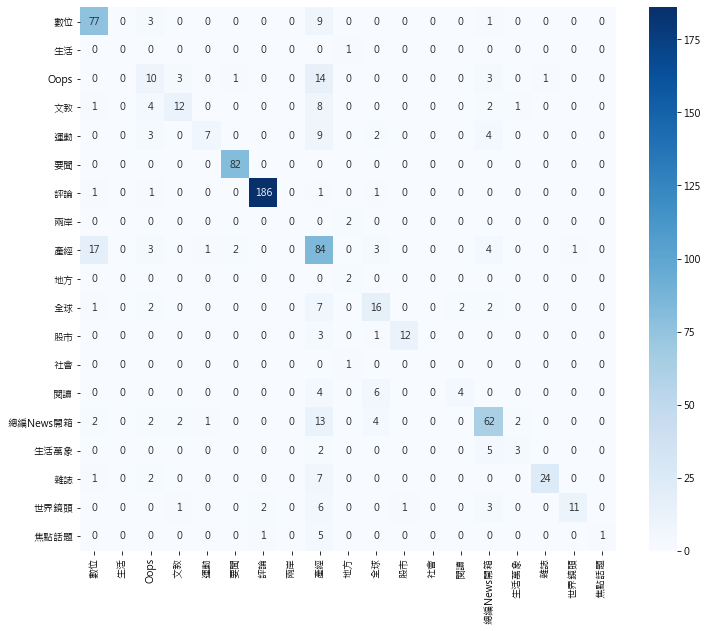

In [22]:
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
plt.rcParams['font.family'] = ['Microsoft JhengHei']
array = metrics.confusion_matrix(y_test, clf.predict(counts_test))
df_cm = pd.DataFrame(array, index = y_test.unique(), columns = y_test.unique())
plt.figure(figsize = (12, 10))
#font = FontProperties(fname=r"c:\windows\fonts\MingLiU.ttc")
sn.heatmap(df_cm, annot = True, cmap = plt.cm.Blues, fmt="d")
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

---
### 斷詞內文
#### 將資料分成訓練集（0.8）和測試集（0.2），random_state = 0

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df['內文斷詞'], df['類別'], test_size = 0.2, random_state = 0)

#### 將 X 訓練集和測試集經 CountVectorizer 處理

In [24]:
count_vect = CountVectorizer(token_pattern = r'\w{1,}', min_df = 2)
count_vect.fit(df['內文斷詞'])
counts_train = CountVectorizer(vocabulary = count_vect.vocabulary_).fit_transform(X_train)
counts_test = CountVectorizer(vocabulary = count_vect.vocabulary_).fit_transform(X_test)
counts_train

<3164x44781 sparse matrix of type '<class 'numpy.int64'>'
	with 567412 stored elements in Compressed Sparse Row format>

#### 用分類器 訓練（經 CountVectorizer 處理的）訓練集，並用訓練後的模型預測（經 CountVectorizer 處理的）測試集
#### 最後分別顯示訓練集與測試集的準確率

In [25]:
%%time
# Maximum number of iterations taken for the solvers to converge.
clf.fit(counts_train, y_train)
print('='*40, ' Score on Counts feature ', '='*40)
print('Score on Train: ', metrics.accuracy_score(y_train, clf.predict(counts_train)))
print('Score on Test: ', metrics.accuracy_score(y_test, clf.predict(counts_test)))
print('='*100)

========================================  Score on Counts feature  ========================================
Score on Train:  0.9984197218710493
Score on Test:  0.8419721871049305
Wall time: 2min 37s


---
#### 將 X 訓練集和測試集經 TfidfVectorizer 處理

In [26]:
tfidf_vect = TfidfVectorizer(token_pattern = r'\w{1,}', min_df = 2) 
# analyzer default = 'word', token_pattern: 任意文字字元，包括數字至少長度為1，才會取(設為2預測結果不變)
# min_df=5為該詞須出現於至少五篇文章才會被納入考量（若min_df = 0.05則是該詞至少出現於5%的文章）
# https://ithelp.ithome.com.tw/articles/10228481
# https://t.codebug.vip/questions-194618.htm
# https://blog.csdn.net/blmoistawinde/article/details/80816179
tfidf_vect.fit(df['內文斷詞'])
tfidf_train = TfidfVectorizer(vocabulary = tfidf_vect.vocabulary_).fit_transform(X_train)
tfidf_test = TfidfVectorizer(vocabulary = tfidf_vect.vocabulary_).fit_transform(X_test)
tfidf_train 

<3164x44781 sparse matrix of type '<class 'numpy.float64'>'
	with 567412 stored elements in Compressed Sparse Row format>

#### 用分類器 訓練（經 TfidfVectorizer 處理的）訓練集，並用訓練後的模型預測（經 TfidfVectorizer 處理的）測試集
#### 最後分別顯示訓練集與測試集的準確率

In [27]:
%%time 
clf.fit(tfidf_train, y_train)
print('='*40, ' Score on TFIDF feature ', '='*40)
print('Score on Train: ', metrics.accuracy_score(y_train, clf.predict(tfidf_train)))
print('Score on Test: ', metrics.accuracy_score(y_test, clf.predict(tfidf_test)))
print('='*100)

========================================  Score on TFIDF feature  ========================================
Score on Train:  0.9073957016434893
Score on Test:  0.7825537294563844
Wall time: 34.7 s


#### confusion matrix 作圖
對上一個訓練的模型，其預測所得到的 confusion matrix（混淆矩陣）（真實類別與預測類別所形成的矩陣）

<AxesSubplot:>

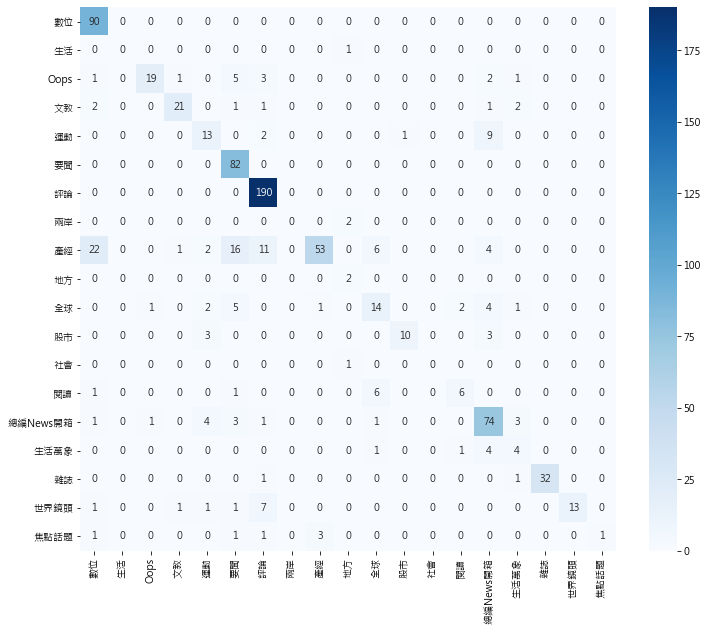

In [28]:
#import seaborn as sn
#import matplotlib.pyplot as plt
#from matplotlib.font_manager import FontProperties
#plt.rcParams['font.family'] = ['Microsoft JhengHei']
array = metrics.confusion_matrix(y_test, clf.predict(counts_test))
df_cm = pd.DataFrame(array, index = y_test.unique(), columns = y_test.unique())
plt.figure(figsize = (12, 10))
#font = FontProperties(fname=r"c:\windows\fonts\MingLiU.ttc")
sn.heatmap(df_cm, annot = True, cmap = plt.cm.Blues, fmt="d")
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix